# Data Preprocessing

In [1]:
import nltk
from nltk.corpus import stopwords
import string
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv('spam.csv')[['label', 'sms']]
df

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
df.groupby('label').describe()

sms                                                               
      count unique                                                top freq
label                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

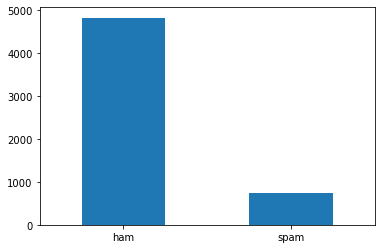

In [4]:
df.label.value_counts().plot(kind="bar", rot=0)

# Naive Bayes Model

In [5]:
def process_text(texts):
    '''
    What will be covered:
    1. Remove punctuation
    2. Remove stopwords
    3. Return list of clean text words
    '''
    
    #1
    nopunc = [char for char in texts if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    #2
    clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    #3
    return clean_words

In [6]:
df['sms'].head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: sms, dtype: object

In [7]:
df['sms'].apply(process_text).head()

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: sms, dtype: object

In [8]:
X, y = df[['sms']], df.label

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=process_text)), # converts strings to integer counts
    ('tfidf',TfidfTransformer()), # converts integer counts to weighted TF-IDF scores
    ('classifier',MultinomialNB()) # train on TF-IDF vectors with Naive Bayes classifier
])

In [11]:
%%time
# fit the model
pipeline.fit(X_train.squeeze(), y_train.squeeze())

Wall time: 9.92 s


Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function process_text at 0x000001B74AAD2940>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [12]:
# predict model by testing data
predictions = pipeline.predict(X_test.squeeze())

In [13]:
print(predictions)

['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']


In [14]:
# classification metrics
print(classification_report(y_test.squeeze(), predictions))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      1587
        spam       1.00      0.69      0.82       252

    accuracy                           0.96      1839
   macro avg       0.98      0.85      0.90      1839
weighted avg       0.96      0.96      0.95      1839



In [15]:
# accuracy
print(accuracy_score(y_test.squeeze(), predictions))

0.9575856443719413


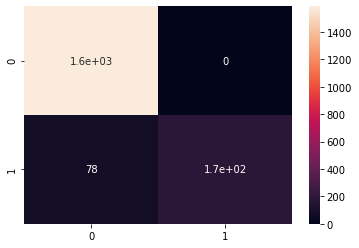

In [16]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test.squeeze(), predictions),annot=True)

In [20]:
%%timeit
pipeline.predict(X_test.squeeze())

5.69 s ± 914 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
X_test

,sms
3245,"Funny fact Nobody teaches volcanoes 2 erupt, t..."
944,I sent my scores to sophas and i had to do sec...
1044,We know someone who you know that fancies you....
2484,Only if you promise your getting out as SOON a...
812,Congratulations ur awarded either �500 of CD g...
...,...
4944,Anyway I don't think I can secure anything up ...
3313,Oh gei. That happend to me in tron. Maybe ill ...
3652,It has issues right now. Ill fix for her by to...
14,I HAVE A DATE ON SUNDAY WITH WILL!!


In [21]:
%%timeit
pipeline.predict(['hey jack what are u doing tonight'])[0]

1.88 ms ± 16.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
